# Gaussian Naive Bayesian alogorithm
https://scikit-learn.org/stable/modules/naive_bayes.html
<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/d0d9f596ba491384422716b01dbe74472060d0d7'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline, make_pipeline
import scikitplot as skplt
# 모델저장
from joblib import dump, load

In [2]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img'

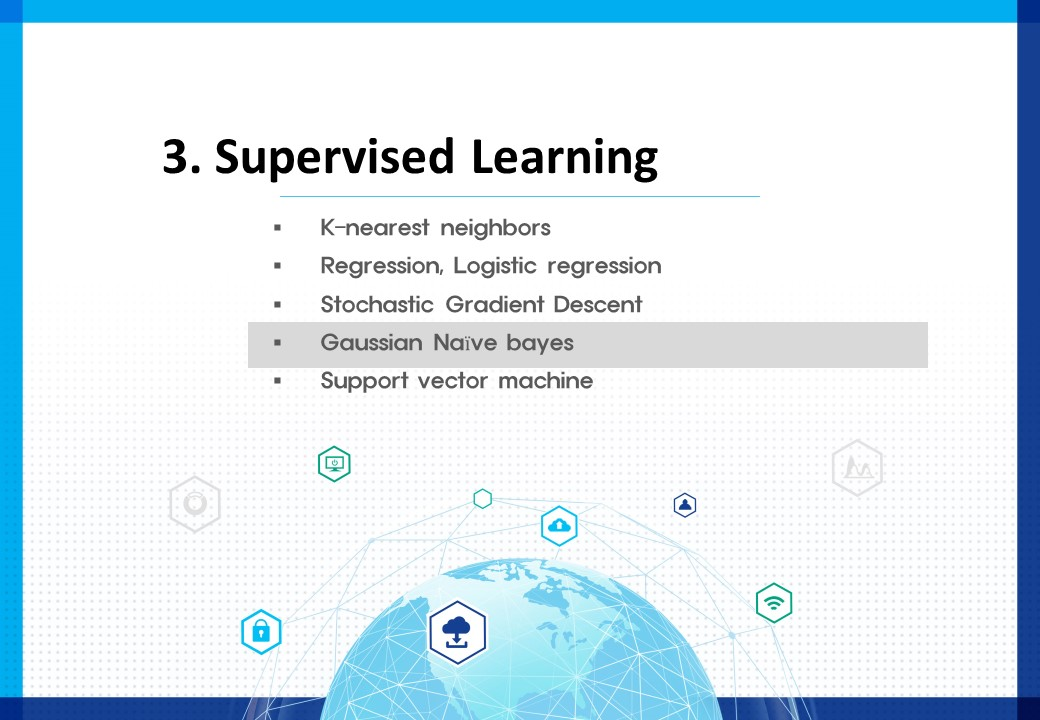

In [4]:
Image(filename=dir_path + '/슬라이드119.jpg', width=width, height=height)

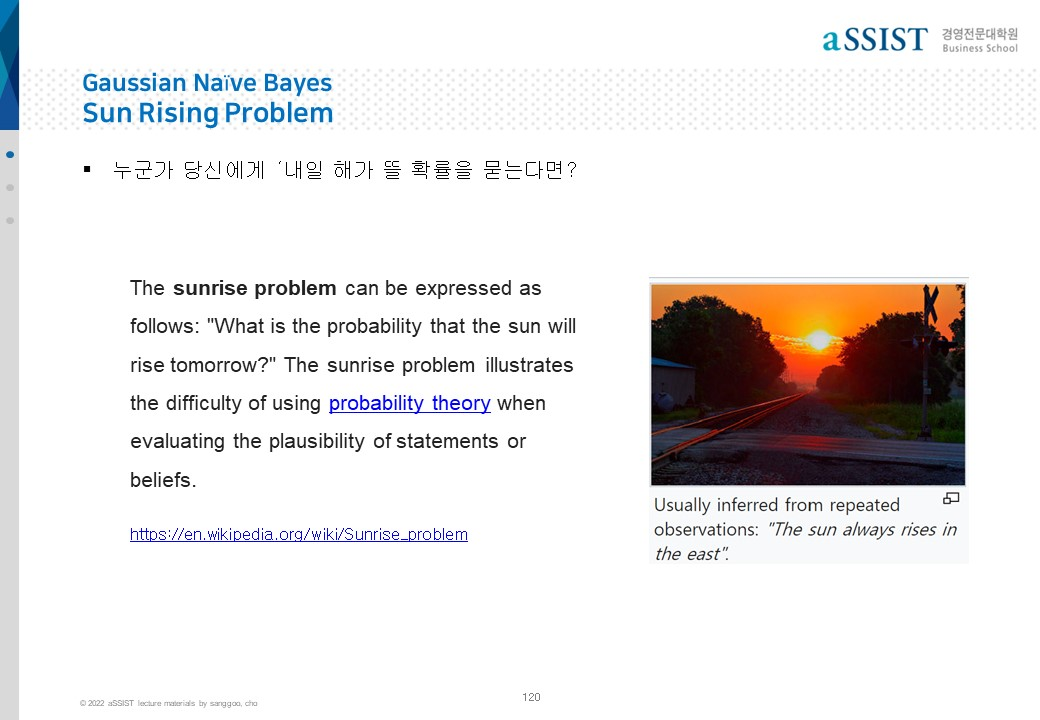

In [5]:
Image(filename=dir_path + '/슬라이드120.jpg', width=width, height=height)

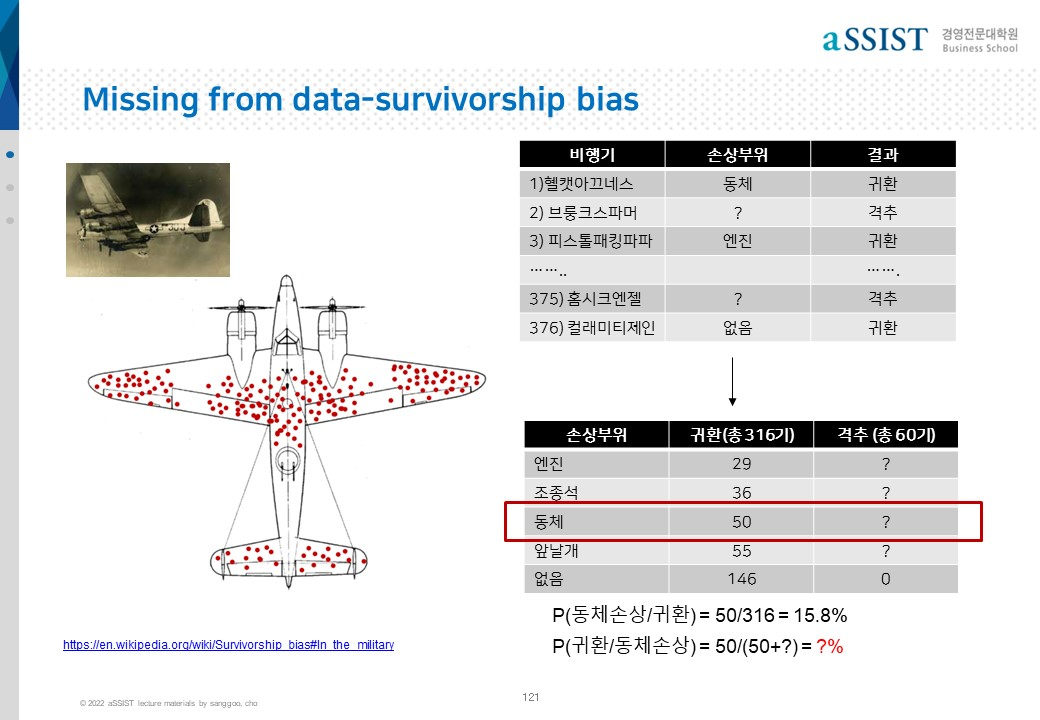

In [6]:
Image(filename=dir_path + '/슬라이드121.jpg', width=width, height=height)

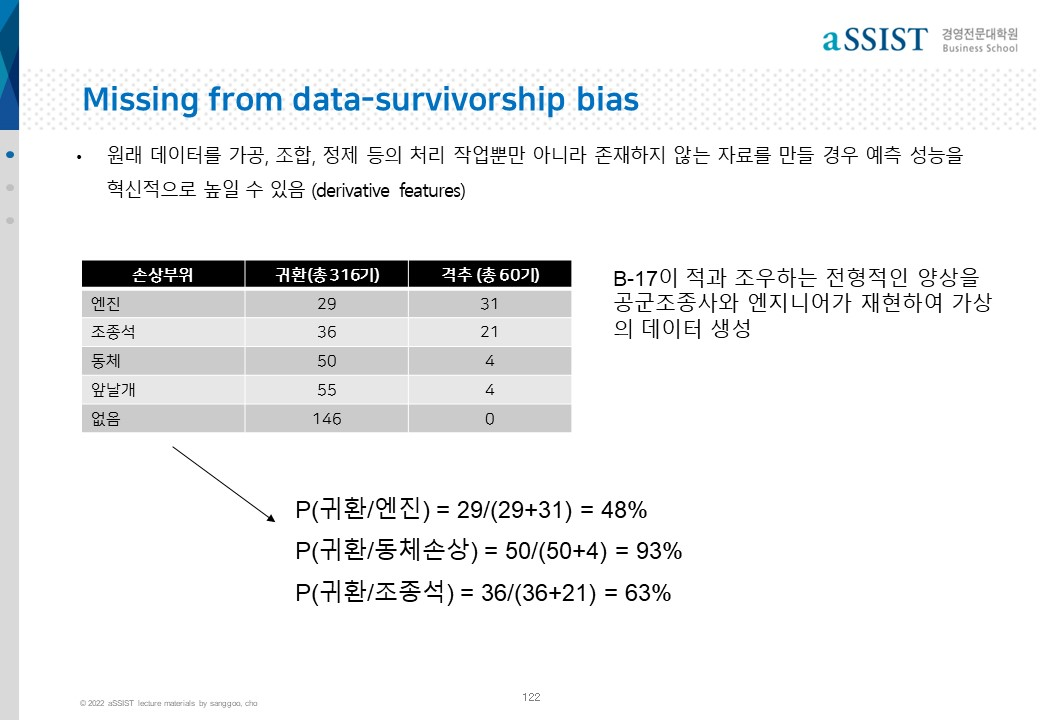

In [7]:
Image(filename=dir_path + '/슬라이드122.jpg', width=width, height=height)

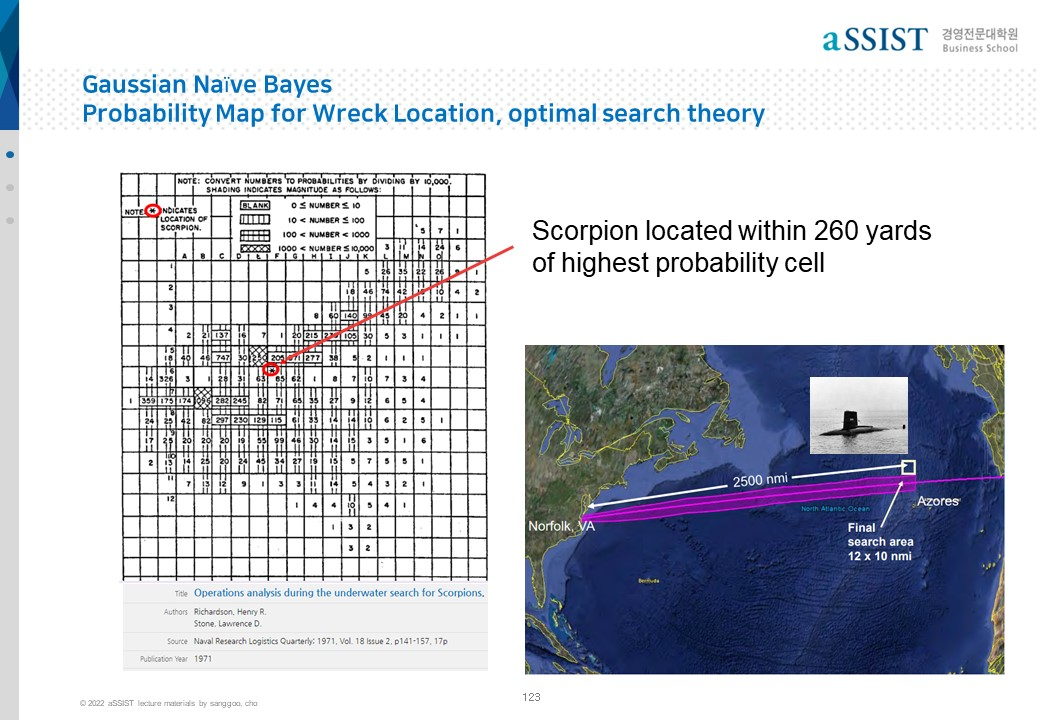

In [8]:
Image(filename=dir_path + '/슬라이드123.jpg', width=width, height=height)

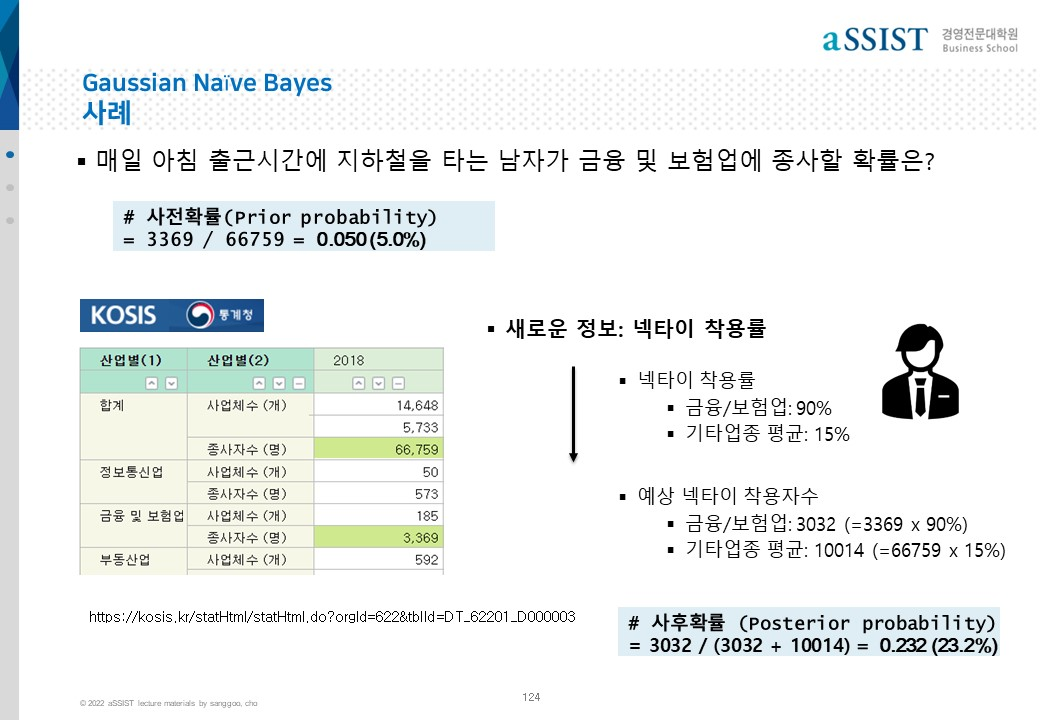

In [9]:
Image(filename=dir_path + '/슬라이드124.jpg', width=width, height=height)

## 1. Probability density function이 우도(likelihood)

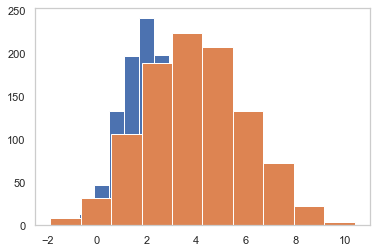

In [10]:
sns.set_style("whitegrid", {'axes.grid' : False})
mu_A, sigma_A = 2, 1
ax = plt.hist(np.random.normal(mu_A, sigma_A, size=(1000)))
mu_B, sigma_B = 4, 2
ax = plt.hist(np.random.normal(mu_B, sigma_B, size=(1000)))

In [11]:
import scipy
scipy.stats.norm(mu_A, sigma_A).pdf(2) # '2'를 관측하였을 경우 A분포의 우도
scipy.stats.norm(mu_B, sigma_B).pdf(2) # '2'를 관측하였을 경우 B분포의 우도

0.3989422804014327

0.12098536225957168

### 2. MAP (Maximum A posterior)
https://en.wikipedia.org/wiki/Naive_Bayes_classifier

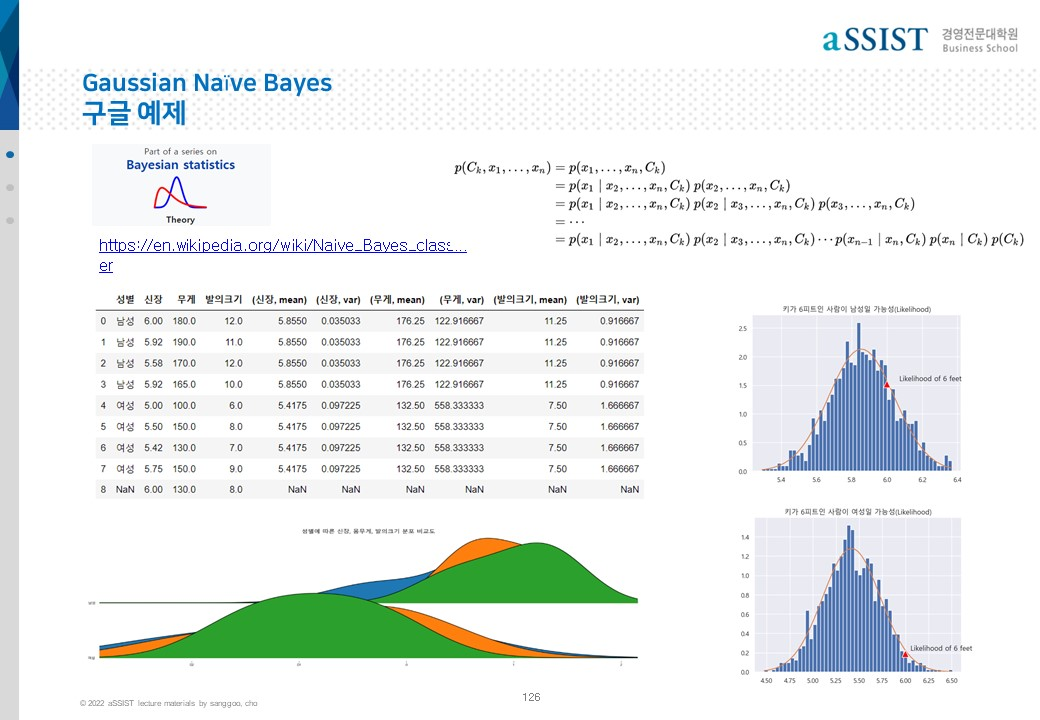

In [15]:
Image(filename=dir_path + '/슬라이드126.jpg', width=width, height=height)

In [12]:
df = pd.DataFrame({'성별' : ['남성', '남성', '남성', '남성','여성','여성','여성','여성'],
                  '신장' : [6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75], # feet
                  '무게' : [180, 190, 170, 165, 100, 150, 130, 150],  # pounds
                  '발의크기' : [12, 11, 12, 10, 6, 8, 7, 9]})             # inches
data = df.groupby('성별')['신장', '무게', '발의크기'].agg(['mean','var']).reset_index('성별')
df = df.merge(data, on='성별')
df = df.append({'신장':6, '무게':130, '발의크기':8}, ignore_index=True)
df

,성별,신장,무게,발의크기,"(신장, mean)","(신장, var)","(무게, mean)","(무게, var)","(발의크기, mean)","(발의크기, var)"
0,남성,6.00,180.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
1,남성,5.92,190.0,11.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
2,남성,5.58,170.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
3,남성,5.92,165.0,10.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
4,여성,5.00,100.0,6.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
5,여성,5.50,150.0,8.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
6,여성,5.42,130.0,7.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
7,여성,5.75,150.0,9.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
8,NaN,6.00,130.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


### 신장(height), 단일변수만 고려할 경우는 남성일 가능성(사후확률)이 높다

In [13]:
import scipy
data
mu_m, sigma_m = data.iloc[0,1], np.sqrt(data.iloc[0,2]); (mu_m, sigma_m**2)
mu_f, sigma_f = data.iloc[1,1], np.sqrt(data.iloc[1,2]); (mu_f, sigma_f**2)
like_m = scipy.stats.norm(mu_m, sigma_m).pdf(6)
print('남성 우도는 {0:.3f}이고, 남성일 사후확률은 {1:.2f}'.format(like_m,0.5*like_m))
like_f = scipy.stats.norm(mu_f, sigma_f).pdf(6)
print('여성 우도는 {0:.3f}이고, 여성일 사후확률은 {1:.2f}'.format(like_f,0.5*like_f))

성별      신장                무게               발의크기          
         mean       var    mean         var   mean       var
0  남성  5.8550  0.035033  176.25  122.916667  11.25  0.916667
1  여성  5.4175  0.097225  132.50  558.333333   7.50  1.666667

(5.855, 0.0350333333333333)

(5.4175, 0.09722499999999992)

남성 우도는 1.579이고, 남성일 사후확률은 0.79
여성 우도는 0.223이고, 여성일 사후확률은 0.11


Text(6.0, 1.5788831832641042, '     Likelihood of 6 feet')

Text(0.5, 1.0, '키가 6피트인 사람이 남성일 가능성(Likelihood)')

Text(6.0, 0.2234587268448157, '  Likelihood of 6 feet')

Text(0.5, 1.0, '키가 6피트인 사람이 여성일 가능성(Likelihood)')

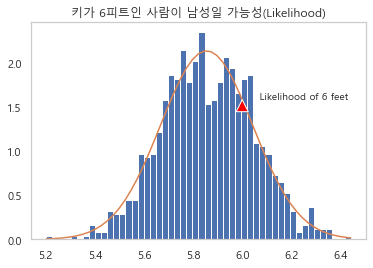

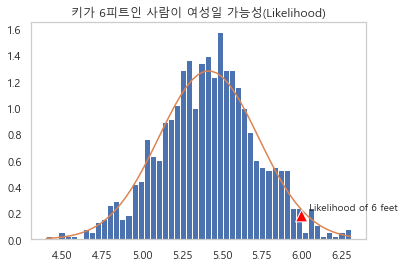

In [8]:
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
s = np.random.normal(mu_m, sigma_m, 1000)
fig, ax = plt.subplots()
n, bins, ignored = ax.hist(s, 50, density=1) # 50 bins
ax.annotate('     Likelihood of 6 feet', xy=(6., like_m), arrowprops=dict(facecolor='red'))
plt.plot(bins, 1/(sigma_m * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_m)**2 / (2*sigma_m**2)))
plt.title('키가 6피트인 사람이 남성일 가능성(Likelihood)')

s = np.random.normal(mu_f, sigma_f, 1000)
fig, ax = plt.subplots()
n, bins, ignored = ax.hist(s, 50, density=1) # 50 bins
ax.annotate('  Likelihood of 6 feet', xy=(6., like_f), arrowprops=dict(facecolor='red'))
plt.plot(bins, 1/(sigma_f * np.sqrt(2 * np.pi))* np.exp(- (bins - mu_f)**2 / (2*sigma_f**2)))
plt.title('키가 6피트인 사람이 여성일 가능성(Likelihood)')

### 신장(height), 체중, 발크기 등 다변량을 고려할 경우는 여성일 가능성(사후확률)이 높다
<img src= 'https://wikimedia.org/api/rest_v1/media/math/render/svg/952da10da33bae76714178cbae4435933e48fdcb'>

In [9]:
import math
mh= ((1/math.sqrt(2*math.pi*data.iloc[0,2])) * 
     math.exp(-1*(6 - data.iloc[0,1])**2/(2*data.iloc[0,2])))
mw= ((1/math.sqrt(2*math.pi*data.iloc[0,4])) * 
     math.exp(-1*(130 - data.iloc[0,3])**2/(2*data.iloc[0,4])))
mf=((1/math.sqrt(2*math.pi*data.iloc[0,6])) * 
    math.exp(-1*(8 - data.iloc[0,5])**2/(2*data.iloc[0,6])))
print('남성일 사후확률 {0:.5f}'.format(mh* mw* mf*0.5))

wh= ((1/math.sqrt(2*math.pi*data.iloc[1,2])) * 
     math.exp(-1*(6 - data.iloc[1,1])**2/(2*data.iloc[1,2])))
ww= ((1/math.sqrt(2*math.pi*data.iloc[1,4])) * 
     math.exp(-1*(130 - data.iloc[1,3])**2/(2*data.iloc[1,4])))
wf=((1/math.sqrt(2*math.pi*data.iloc[1,6])) * 
    math.exp(-1*(8 - data.iloc[1,5])**2/(2*data.iloc[1,6])))
print('여성일 사후확률 {0:.5f}'.format(wh* ww* wf*0.5))

남성일 사후확률 0.00000
여성일 사후확률 0.00054


In [10]:
df

,성별,신장,무게,발의크기,"(신장, mean)","(신장, var)","(무게, mean)","(무게, var)","(발의크기, mean)","(발의크기, var)"
0,남성,6.00,180.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
1,남성,5.92,190.0,11.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
2,남성,5.58,170.0,12.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
3,남성,5.92,165.0,10.0,5.8550,0.035033,176.25,122.916667,11.25,0.916667
4,여성,5.00,100.0,6.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
5,여성,5.50,150.0,8.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
6,여성,5.42,130.0,7.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
7,여성,5.75,150.0,9.0,5.4175,0.097225,132.50,558.333333,7.50,1.666667
8,NaN,6.00,130.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
X= df.iloc[0:8, 1:4]
y= preprocessing.LabelBinarizer().fit_transform(df.iloc[0:8, 0]) # 남성 '0', 여성 '1'
model = GaussianNB()
model.fit(X, y)
model.predict([[6,13,8]]) # reshape(-1,1)
model.predict_proba([[6,13,8]])

GaussianNB()

array([1])

array([[7.14378768e-58, 1.00000000e+00]])

## 3. Gaussian Naive Bayes

### 의사결정경계선이 곡선으로 나타나고 예측 확률은 '0', '1'에 편중하여 생성

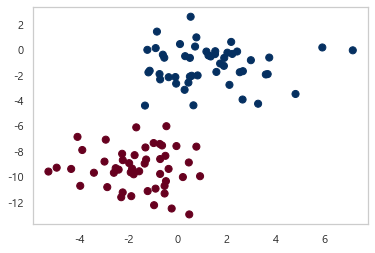

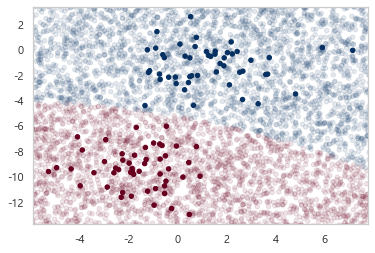

In [12]:
from sklearn.datasets import make_blobs
plt.rcParams['axes.unicode_minus'] = False
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');plt.show()

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(5000, 2)
ynew= model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

(array([2086.,   66.,   37.,   35.,   42.,   32.,   44.,   43.,   66.,
        2549.]),
 array([3.0043337e-16, 1.0000000e-01, 2.0000000e-01, 3.0000000e-01,
        4.0000000e-01, 5.0000000e-01, 6.0000000e-01, 7.0000000e-01,
        8.0000000e-01, 9.0000000e-01, 1.0000000e+00]),
 <BarContainer object of 10 artists>)

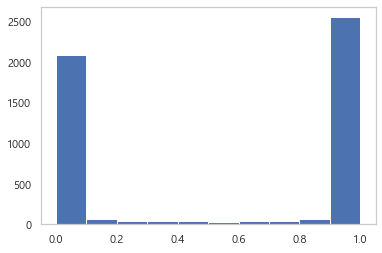

In [13]:
yprob = model.predict_proba(Xnew)
plt.hist(yprob[:, 1])

### 베이지안 이론에서 확률이란 관측된 사실(데이터)에 따라 변화되는 신념(credibility)
<img src='https://miro.medium.com/max/1400/1*t6Ma32W2rGd2FOfFkSyxFA.png'>

## 4. Text mining

In [14]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
corpus
df = pd.DataFrame(corpus, columns=['content'])
df

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

,content
0,This is the first document.
1,This document is the second document.
2,And this is the third one.
3,Is this the first document?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus) # X = vectorizer.fit_transform(df['content'])
print(vectorizer.get_feature_names())
print(X.toarray())

data = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
data

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


TF–IDF
- CountVectorizer 방식의 단점은 너무 자주 나오는 단어에 가중치가 높아져 sub-optimal in some classification algorithms.
- 이러한 점을 보완하기 위해 *term frequency-inverse document frequency* (*TF–IDF*) 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


- 총 3개의 문서가 리스트형식으로 있다고 가정

In [17]:
sample_kor = ['아버지가 가방에 들어가신다.', '어머니는 시장에 가신다', '붙여쓰면모르지']
vec = CountVectorizer()
X = vec.fit_transform(sample_kor)
X.toarray()
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

array([[1, 0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0]], dtype=int64)

,가방에,가신다,들어가신다,붙여쓰면모르지,시장에,아버지가,어머니는
0,1,0,1,0,0,1,0
1,0,1,0,0,1,0,1
2,0,0,0,1,0,0,0


## 5. Multinomial Naive Bayes
###  Example: Classifying Text

- text classification에 종종 사용
- 단어의 출현빈도가 특성변수와 관련
- 20 Newsgroups corpus를 사용하여 3개의 그룹으로 분류하는 방법

In [18]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.keys()
df = pd.DataFrame(data['data'], columns= ['content'])
df['target'] = pd.Series(data.target)
convert = dict(zip(np.arange(len(data.target_names)), data.target_names, ))
df['categories'] = df['target'].map(convert)
df.head()
df.shape

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

,content,target,categories
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


(11314, 3)

Here is a representative entry from the data:

In [19]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(f'corpus의 자료형태는 : {type(train.data)}')
print(train.data[5])

corpus의 자료형태는 : <class 'list'>
From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



### TF-IDF vectorizer와 multinomial naive Bayes classifier를 를 pipeline으로 구성

파이프라인을 데이터에 적용하여 예측하면

- test data의 레이블을 예측하고 실제 자료의 레이블과 confusion matrix를 확인하면

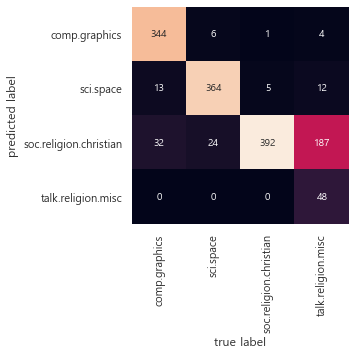

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target) 
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(test.target, labels) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names) 
plt.xlabel('true label') 
plt.ylabel('predicted label');

##  <font color='red'> 각 단어의 빈도로 예측이 거의 완벽
### 모든 naive algorithm은 대용량 high-dimensional text 자료에 잘 사용할 경우 언비리버블하게 잘 예측한다
### 예측 반복작업을 함수로 만들어

Let's try it out:

In [21]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s]) 
    return train.target_names[pred[0]]

predict_category('The Russian rocket agency is expected to')
predict_category('Worship like a pop at the Shrine of Your Lies')

'sci.space'

'soc.religion.christian'

### 새로운 값(text)를 예측해보자

In [22]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [23]:
model.predict(['I am a robot cop.'])
y_pred = model.predict(['I am a robot cop.'])
train.target_names
train.target_names[y_pred[0]]

array([2], dtype=int64)

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

'soc.religion.christian'

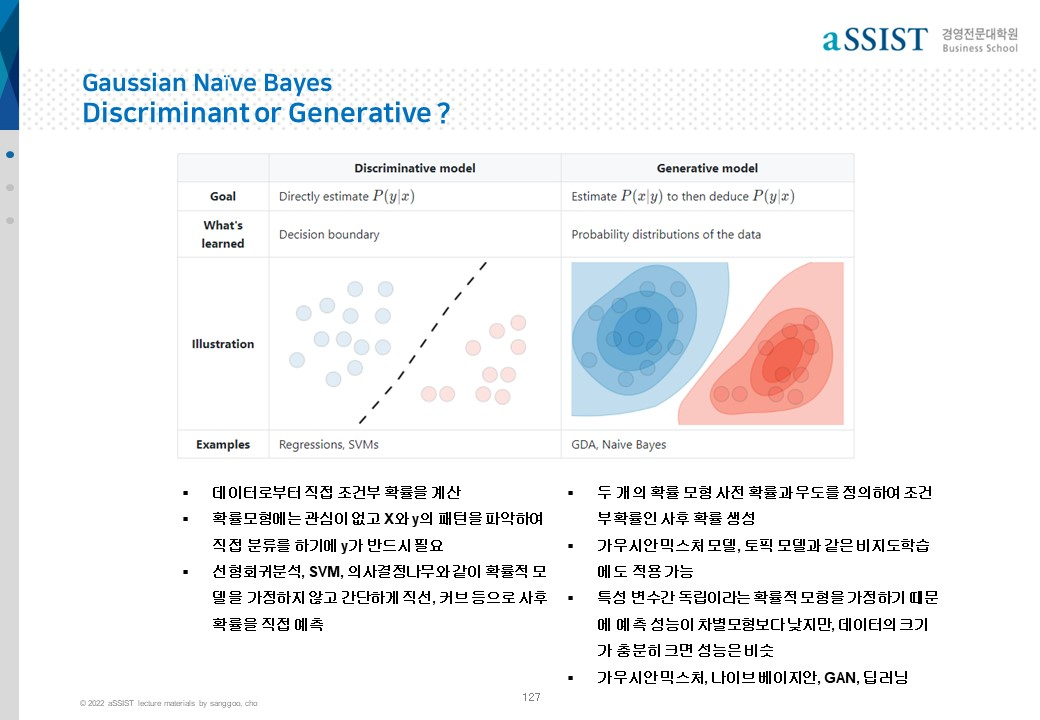

In [16]:
Image(filename=dir_path + '/슬라이드127.jpg', width=width, height=height)

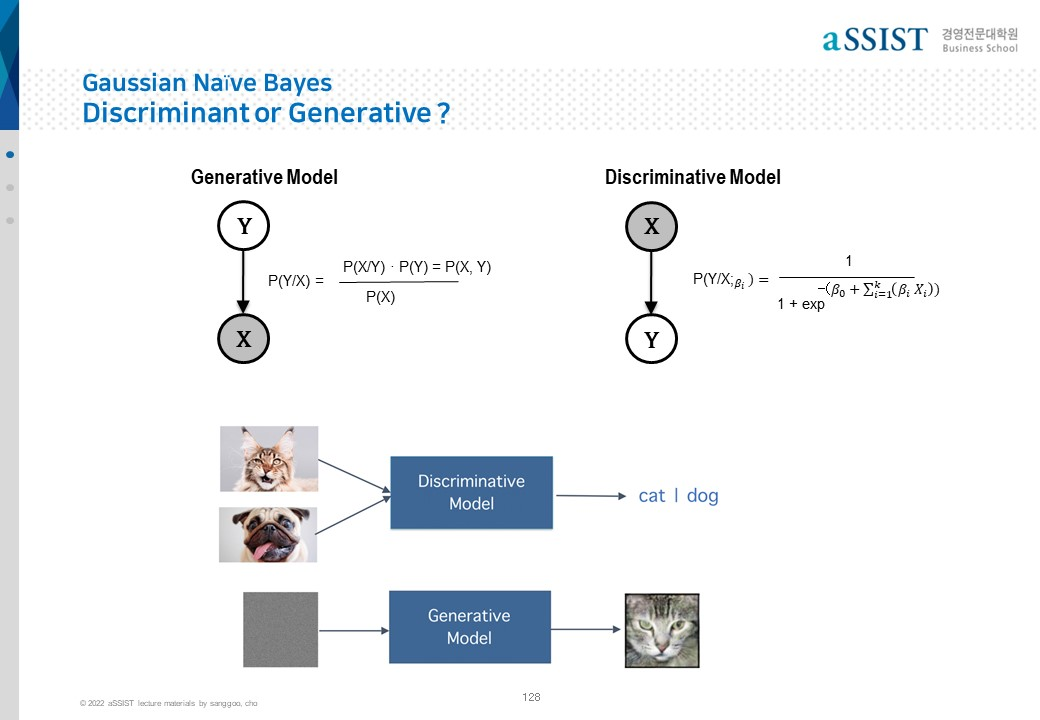

In [17]:
Image(filename=dir_path + '/슬라이드128.jpg', width=width, height=height)

## Data centric or model centric?
### 데이터의 특성에 따라 예측을 잘하는 알고리즘이 있음

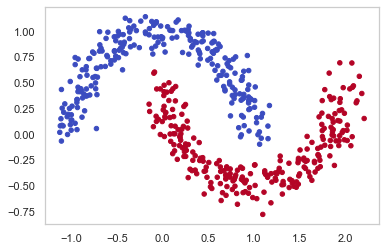

In [12]:
from sklearn.datasets import make_moons, make_circles, make_classification
X, y = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm');

Text(0.5, 1.0, 'KNeighborsClassifier()')

Text(0.5, 1.0, 'GaussianNB()')

Text(0.5, 1.0, 'SGDClassifier()')

Text(0.5, 1.0, 'LogisticRegression()')

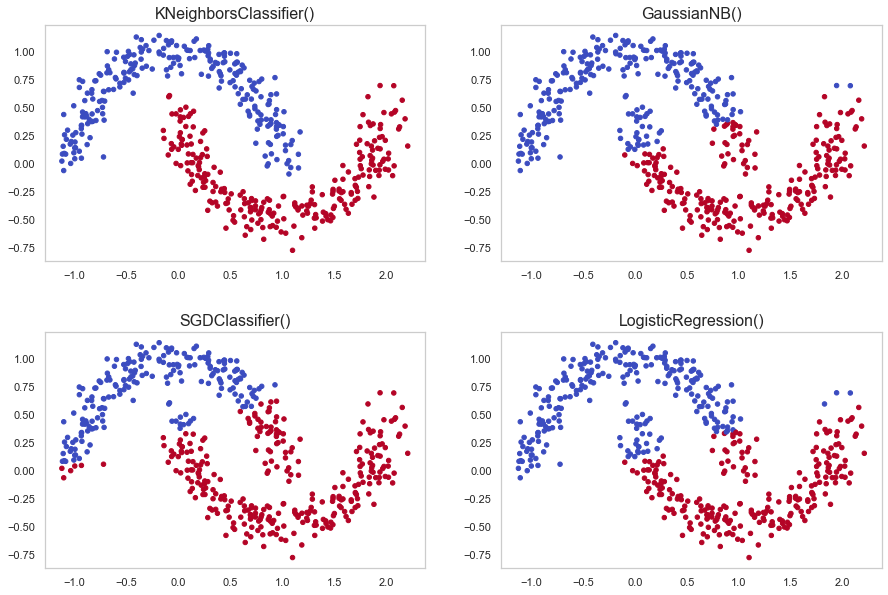

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression

fig, axs = plt.subplots(2,2, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
classifiers = [KNeighborsClassifier(), GaussianNB(), 
               SGDClassifier(), LogisticRegression()]
for i, classifier in enumerate(classifiers) :
    axs[i].set_title(str(classifier), fontsize='16')
    y_pred = classifier.fit(X, y).predict(X) 
    axs[i].scatter(X[:, 0], X[:, 1], c=y_pred, s=20, cmap='coolwarm')

# END